In [2]:
% matplotlib inline
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display
from sklearn import metrics

In [3]:
# Cargamos el dataset
df = pd.read_csv('properatti.csv')
print(df.columns)
df.head()

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
Unnamed: 0                    121220 non-null int64
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 no

In [5]:
#Elegimos algunas columnas
df = df[['property_type', 'place_name', 'place_with_parent_names', 'state_name', 'geonames_id', 'lat', 'lon', 
        'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'floor', 'rooms',
        'expenses', 'description', 'title']]

In [6]:
#Seleccionamos capital federal
df_capital_precio = df[pd.notnull((df['price_usd_per_m2'])) & (df['state_name'] == 'Capital Federal')]
df_capital_precio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23434 entries, 0 to 121219
Data columns (total 16 columns):
property_type              23434 non-null object
place_name                 23434 non-null object
place_with_parent_names    23434 non-null object
state_name                 23434 non-null object
geonames_id                22390 non-null float64
lat                        17217 non-null float64
lon                        17217 non-null float64
price_aprox_usd            23434 non-null float64
surface_total_in_m2        23434 non-null float64
surface_covered_in_m2      22319 non-null float64
price_usd_per_m2           23434 non-null float64
floor                      1405 non-null float64
rooms                      10554 non-null float64
expenses                   5929 non-null float64
description                23434 non-null object
title                      23434 non-null object
dtypes: float64(10), object(6)
memory usage: 3.0+ MB


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


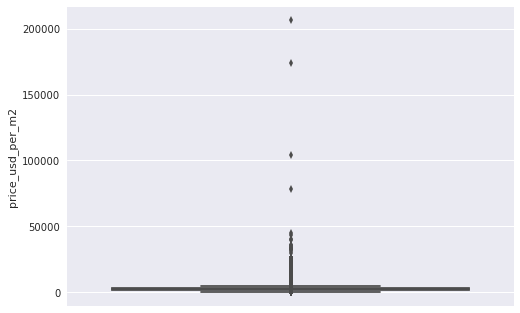

In [7]:
sns.boxplot(y="price_usd_per_m2", data=df_capital_precio)

In [8]:
#Eliminamos los que tienen valor por m2 mayor a 5100 y los que tienen sup cubierta mayor a sup total
df_capital_precio = df[pd.notnull((df['price_usd_per_m2'])) & (df['state_name'] == 'Capital Federal') & 
                       (df['price_usd_per_m2'] < 5100)].copy()
df_capital_precio = df_capital_precio[df_capital_precio['surface_total_in_m2'] >= df_capital_precio['surface_covered_in_m2']]
a = df_capital_precio['surface_total_in_m2'] >= df_capital_precio['surface_covered_in_m2']
a.unique()

array([ True], dtype=bool)

In [9]:
#Eliminamos los que tienen valor por m2 menor a 400
df_capital_precio = df_capital_precio[df_capital_precio['price_usd_per_m2'] > 400]

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


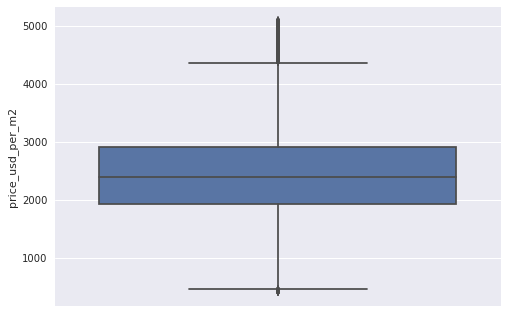

In [10]:
sns.boxplot(y="price_usd_per_m2", data=df_capital_precio)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


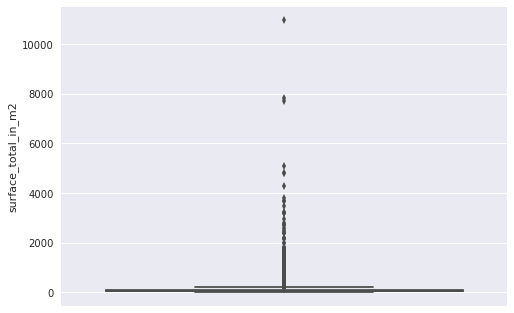

In [11]:
sns.boxplot(y="surface_total_in_m2", data=df_capital_precio)

In [12]:
df_capital_precio = df_capital_precio[(df_capital_precio['surface_total_in_m2'] <1000)].copy()


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


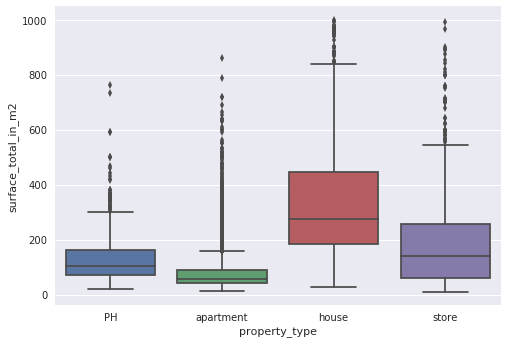

In [13]:
sns.boxplot(y="surface_total_in_m2",x="property_type", data=df_capital_precio)

In [14]:
def get_outliers_by_property(property_type):
    if property_type == "PH":
        return 400
    elif property_type == "apartment":
        return 200
    elif property_type == "house":
        return 900
    elif property_type == "store":
        return 600
    return 1000

def compute_outlier_surface(property_type, surface):
    hight_surface = get_outliers_by_property(property_type)
    if surface <  hight_surface:
        return surface
    else:
        return hight_surface
        

In [15]:
#Eliminamos outliers de sup m2 segun tipo de propiedad
df_capital_precio['surface_total_in_m2'] = df_capital_precio.apply(lambda row: compute_outlier_surface(row['property_type'],row['surface_total_in_m2']),axis=1)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


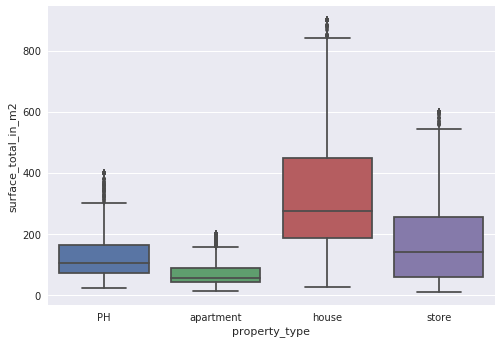

In [16]:
sns.boxplot(y="surface_total_in_m2",x="property_type", data=df_capital_precio)

In [17]:
#Completamos los valores faltantes de lat y lon con la media de cada barrio
lat_by_place_name = df_capital_precio.groupby('place_name')['lat'].mean()
lon_by_place_name = df_capital_precio.groupby('place_name')['lon'].mean()

In [18]:
df_capital_precio['lat'] = df_capital_precio.apply(lambda row: lat_by_place_name[row['place_name']], axis=1)
df_capital_precio['lon'] = df_capital_precio.apply(lambda row: lon_by_place_name[row['place_name']], axis=1)

In [19]:
df_capital_precio.head()

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,description,title
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,-34.677247,-58.532309,62000.0,55.0,40.0,1127.272727,NaN,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,-34.677247,-58.532309,72000.0,55.0,55.0,1309.090909,NaN,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO
7,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,3436077.0,-34.564074,-58.453559,138000.0,45.0,40.0,3066.666667,NaN,NaN,NaN,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...
8,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,3436077.0,-34.564074,-58.453559,195000.0,65.0,60.0,3000.000000,NaN,NaN,NaN,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,..."
13,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Capital Federal,3430234.0,-34.590498,-58.424523,111700.0,50.0,30.0,2234.000000,NaN,1.0,NaN,Torre I Mondrian. 3 ambientes con terraza y d...,Vitraux Palermo


In [20]:
def get_expenses(x):
    if np.isnan(x['expenses']):
        return 'no definido'
    x = x['expenses']/x['surface_total_in_m2']
    if 0 < x <= 25:
        return 'baja'
    elif 25 < x <= 45:
        return 'media'
    elif 45 < x <= 100:
        return 'alta'
    return 'no definido'

In [21]:
#Creamos categoricas para las expensas (baja,media,alta, no definido)
expenses_for_surface = df_capital_precio[['expenses','surface_total_in_m2']].apply(lambda row: row['expenses']/row['surface_total_in_m2'],axis=1)

In [22]:
print("Baja: {}".format(np.percentile(expenses_for_surface.dropna(), 30)))

print("Alta: {}".format(np.percentile(expenses_for_surface.dropna(), 70)))

Baja: 25.0
Alta: 45.48560606060603


In [23]:
df_capital_precio['expenses_range'] = df_capital_precio[['expenses','surface_total_in_m2']].apply(get_expenses,axis=1)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


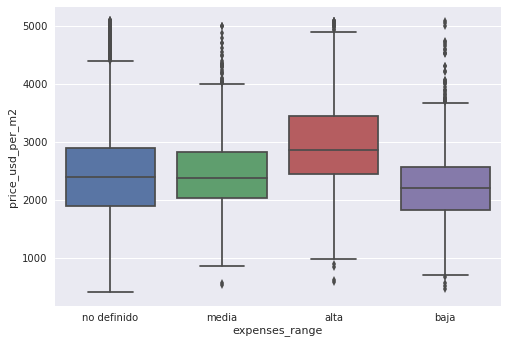

In [24]:
sns.boxplot(y="price_usd_per_m2", x="expenses_range", data=df_capital_precio)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


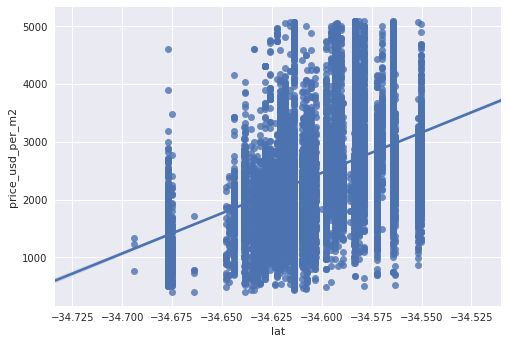

In [25]:
sns.regplot(y="price_usd_per_m2", x="lat", data=df_capital_precio)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


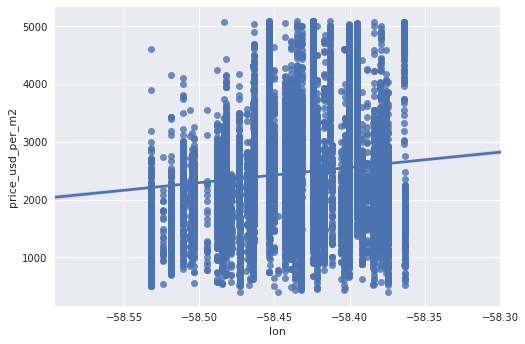

In [26]:
sns.regplot(y="price_usd_per_m2", x="lon", data=df_capital_precio)

In [27]:
df_capital_precio[['lat','lon','price_usd_per_m2','expenses']].corr()

,lat,lon,price_usd_per_m2,expenses
lat,1.000000,-0.112062,0.435087,-0.029403
lon,-0.112062,1.000000,0.119069,-0.038552
price_usd_per_m2,0.435087,0.119069,1.000000,0.021093
expenses,-0.029403,-0.038552,0.021093,1.000000


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


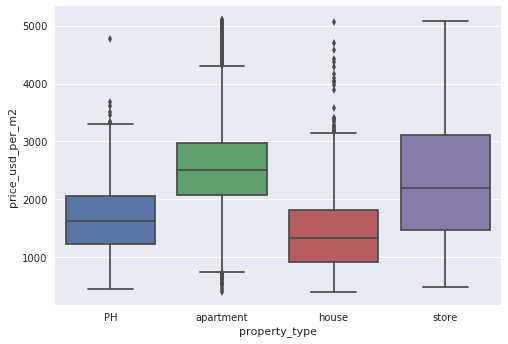

In [28]:
sns.boxplot(y="price_usd_per_m2", x="property_type", data=df_capital_precio)

In [29]:
rooms_nulos = df_capital_precio.apply(lambda row: pd.isnull(row['rooms']) , axis = 1)

len([t for t in rooms_nulos if t==True])

11181

In [30]:
import re
def get_rooms(row):
    if pd.isnull(row['rooms']):
        num = re.findall("\d ambiente", row['description'],re.IGNORECASE)
        if len(num) > 0:
            return int(num[0].split(" ")[0])
        else:
            num = re.findall("\d dormitorio", row['description'],re.IGNORECASE)
            if len(num) > 0:
                return int(num[0].split(" ")[0])+1
            else:
                num = re.findall("\d habitaci", row['description'],re.IGNORECASE)
                if len(num) > 0:
                    return int(num[0].split(" ")[0])+1
    return row['rooms']
    

In [31]:
#Conseguimos algunos valores de cantidad de ambientes de la descripcion
ambientes = df_capital_precio.apply(get_rooms, axis=1)

len([t for t in pd.isnull(ambientes) if t==True])

5074

In [32]:
df_capital_precio['rooms'] = ambientes

In [33]:
df_capital_precio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20410 entries, 0 to 121219
Data columns (total 17 columns):
property_type              20410 non-null object
place_name                 20410 non-null object
place_with_parent_names    20410 non-null object
state_name                 20410 non-null object
geonames_id                19492 non-null float64
lat                        20410 non-null float64
lon                        20410 non-null float64
price_aprox_usd            20410 non-null float64
surface_total_in_m2        20410 non-null float64
surface_covered_in_m2      20410 non-null float64
price_usd_per_m2           20410 non-null float64
floor                      1314 non-null float64
rooms                      15336 non-null float64
expenses                   5386 non-null float64
description                20410 non-null object
title                      20410 non-null object
expenses_range             20410 non-null object
dtypes: float64(10), object(7)
memory usage: 3.4+

In [34]:
df_capital_precio['surface_discrete']=df_capital_precio.apply(lambda row: int(row['surface_total_in_m2']/10) ,axis =1)


In [35]:
def get_rooms_by_mean(row):
    if pd.isnull(row['rooms']) & (row['property_type'] != "PH"):
        surface_total = int(row['surface_total_in_m2'])
        if surface_total <= 35:
            return 1
        elif 35 < surface_total <= 55:
            return 2
        elif 55 < surface_total <= 100:
            return 3
        else:
            return 4
    return row['rooms']

In [36]:
df_capital_precio[['surface_total_in_m2','surface_discrete','rooms']].head()

,surface_total_in_m2,surface_discrete,rooms
0,55.0,5,2.0
2,55.0,5,2.0
7,45.0,4,NaN
8,65.0,6,NaN
13,50.0,5,1.0


In [37]:

ambientes = df_capital_precio.apply(get_rooms_by_mean ,axis =1)


len([t for t in pd.isnull(ambientes) if t==True])

179

In [38]:
#Completamos los rooms faltantes segun la cantidad de m2 que tiene la propeidad
df_capital_precio['rooms'] = ambientes
df_capital_precio[['surface_total_in_m2','surface_discrete','rooms']].head()

,surface_total_in_m2,surface_discrete,rooms
0,55.0,5,2.0
2,55.0,5,2.0
7,45.0,4,2.0
8,65.0,6,3.0
13,50.0,5,1.0


In [39]:
df_capital_precio.groupby('surface_discrete')['rooms'].mean().head()

surface_discrete
1    1.021739
2    1.149351
3    1.477116
4    1.895172
5    2.279667
Name: rooms, dtype: float64

In [40]:
data_set_final = df_capital_precio[pd.notnull(df_capital_precio['rooms'])].copy()

In [41]:
data_set_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20231 entries, 0 to 121219
Data columns (total 18 columns):
property_type              20231 non-null object
place_name                 20231 non-null object
place_with_parent_names    20231 non-null object
state_name                 20231 non-null object
geonames_id                19319 non-null float64
lat                        20231 non-null float64
lon                        20231 non-null float64
price_aprox_usd            20231 non-null float64
surface_total_in_m2        20231 non-null float64
surface_covered_in_m2      20231 non-null float64
price_usd_per_m2           20231 non-null float64
floor                      1310 non-null float64
rooms                      20231 non-null float64
expenses                   5348 non-null float64
description                20231 non-null object
title                      20231 non-null object
expenses_range             20231 non-null object
surface_discrete           20231 non-null int64
d

In [42]:
del data_set_final['geonames_id']
del data_set_final['floor']
del data_set_final['expenses']

In [43]:
data_set_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20231 entries, 0 to 121219
Data columns (total 15 columns):
property_type              20231 non-null object
place_name                 20231 non-null object
place_with_parent_names    20231 non-null object
state_name                 20231 non-null object
lat                        20231 non-null float64
lon                        20231 non-null float64
price_aprox_usd            20231 non-null float64
surface_total_in_m2        20231 non-null float64
surface_covered_in_m2      20231 non-null float64
price_usd_per_m2           20231 non-null float64
rooms                      20231 non-null float64
description                20231 non-null object
title                      20231 non-null object
expenses_range             20231 non-null object
surface_discrete           20231 non-null int64
dtypes: float64(7), int64(1), object(7)
memory usage: 2.5+ MB


In [51]:
df_temp = data_set_final[['lat','lon','property_type','place_name','surface_total_in_m2','surface_covered_in_m2'
                     ,'rooms','expenses_range','price_usd_per_m2']]

In [52]:
#Dataset para hacer la regresión
df_reg = df_temp[df_temp['surface_covered_in_m2'].notnull()]

In [85]:
#Variables dummies de las categoricas y eliminamos la primera para que no haya combinacion lineal
df_dummies = pd.get_dummies(df_reg, drop_first= True)
df_dummies.head()

,lat,lon,surface_total_in_m2,surface_covered_in_m2,rooms,price_usd_per_m2,property_type_apartment,property_type_house,property_type_store,place_name_Agronomía,...,place_name_Villa Pueyrredón,place_name_Villa Real,place_name_Villa Riachuelo,place_name_Villa Santa Rita,place_name_Villa Soldati,place_name_Villa Urquiza,place_name_Villa del Parque,expenses_range_baja,expenses_range_media,expenses_range_no definido
0,-34.677247,-58.532309,55.0,40.0,2.0,1127.272727,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-34.677247,-58.532309,55.0,55.0,2.0,1309.090909,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,-34.564074,-58.453559,45.0,40.0,2.0,3066.666667,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,-34.564074,-58.453559,65.0,60.0,3.0,3000.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13,-34.590498,-58.424523,50.0,30.0,1.0,2234.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [107]:
#Separamos las numericas de las categoricas para usar PolynomialFeatures
df_dummies_num = df_dummies[['lat','lon','surface_total_in_m2','surface_covered_in_m2','rooms']]
df_dummies_categ = df_dummies.drop(['lat','lon','surface_total_in_m2',
                                    'surface_covered_in_m2','rooms','price_usd_per_m2'],axis = 1).copy()


In [92]:
#Usamos polynomialfeatures y convertimos todo en arrays
matrix_reg_num = PolynomialFeatures(2,include_bias=True,interaction_only=False).fit_transform(df_dummies_num)
matrix_reg_categ = df_dummies_categ.values
matrix_df = np.concatenate((matrix_reg_num, matrix_reg_categ),axis=1)

In [93]:
y = df_dummies[['price_usd_per_m2']].values
X = matrix_df
display(X,y)

array([[  1.        , -34.67724662, -58.53230853, ...,   0.        ,
          0.        ,   1.        ],
       [  1.        , -34.67724662, -58.53230853, ...,   0.        ,
          0.        ,   1.        ],
       [  1.        , -34.56407426, -58.45355874, ...,   0.        ,
          0.        ,   1.        ],
       ..., 
       [  1.        , -34.59217544, -58.3951365 , ...,   0.        ,
          0.        ,   1.        ],
       [  1.        , -34.57255194, -58.48223871, ...,   0.        ,
          0.        ,   1.        ],
       [  1.        , -34.61405036, -58.43222226, ...,   0.        ,
          0.        ,   0.        ]])

array([[ 1127.27272727],
       [ 1309.09090909],
       [ 3066.66666667],
       ..., 
       [ 3750.        ],
       [ 2858.69565217],
       [ 1675.32467532]])

In [95]:
#Modelo regresion lineal

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 0)

model = LinearRegression()
model.fit(Xtrain,ytrain)

y_predict = model.predict(Xtest)

#Train = Xtrain.join(ytrain)
#Test = Xtest.join(ytest)
print('Train size: ', Train.shape)
print('Test size: ', Test.shape)
print('X test size: ', Xtest.shape)
print('Y test size: ', ytest.shape)
print('X train size: ', Xtrain.shape)
print('Y train size: ', ytrain.shape)

Train size:  (15173, 73)
Test size:  (5058, 74)
X test size:  (5058, 88)
Y test size:  (5058, 1)
X train size:  (15173, 88)
Y train size:  (15173, 1)


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


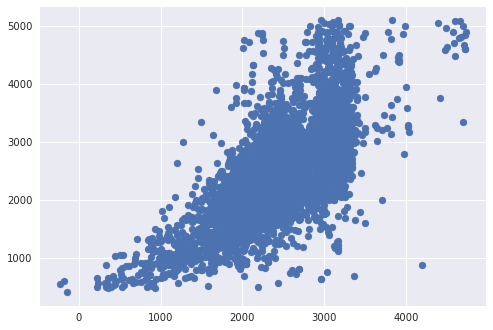

In [96]:
#scatter de las predicciones vs los valores correctos
plt.scatter(y_predict,ytest)

In [97]:
#Vemos las propiedades que peor se estimaron para encontrar errores y poder mejorar el modelo
e = y_predict - ytest
Test = Test.assign(error = y_predict - ytest)
Test.sort_values(by = 'error', ascending=False).head(10)

,lat,lon,surface_total_in_m2,surface_covered_in_m2,rooms,property_type_apartment,property_type_house,property_type_store,place_name_Agronomía,place_name_Almagro,...,place_name_Villa Riachuelo,place_name_Villa Santa Rita,place_name_Villa Soldati,place_name_Villa Urquiza,place_name_Villa del Parque,expenses_range_baja,expenses_range_media,expenses_range_no definido,price_usd_per_m2,error
47,-34.613752,-58.363825,80.0,50.0,3.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,875.000000,3321.114035
113606,-34.583294,-58.424300,19.0,19.0,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,684.210526,2685.532086
64645,-34.615667,-58.384063,200.0,639.0,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,624.413146,2332.558385
64643,-34.615667,-58.384063,200.0,639.0,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,624.413146,2332.558385
109317,-34.564074,-58.453559,82.0,69.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,750.000000,2283.587633
106874,-34.583294,-58.424300,31.0,24.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1115.873226,2048.988575
106879,-34.583294,-58.424300,31.0,24.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1158.366452,2006.495350
106872,-34.583294,-58.424300,34.0,24.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1167.442647,1968.842128
106881,-34.583294,-58.424300,31.0,25.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1222.457419,1950.465874
42191,-34.563135,-58.473774,66.0,66.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,715.409091,1935.699992


In [98]:
#Scores para la regresion lineal
print ('MAE:', metrics.mean_absolute_error(ytest, y_predict))
print ('MSE:', metrics.mean_squared_error(ytest, y_predict))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, y_predict)))
print ('R2:', metrics.r2_score(ytest, y_predict))

MAE: 437.689173819
MSE: 346166.317802
RMSE: 588.359004182
R2: 0.500656323956


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=53)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14161, 88) (14161, 1)
(6070, 88) (6070, 1)


In [100]:
# Regresion lineal, ridge y lasso

al_ridge = np.linspace(0.001, 3, 30)
al_lasso = np.linspace(0.001, 3, 30)
kf = KFold(n_splits=5, shuffle=True, random_state=12)

# Instanciamos los modelos

lm = LinearRegression()
lmRidgeCV = RidgeCV(alphas=al_ridge, cv=kf, normalize=False)
lmLassoCV = LassoCV(alphas=al_lasso, cv=kf, normalize=False)

In [101]:
# Hacemos los fits respectivos

lm.fit(X_train, y_train)
lmRidgeCV.fit(X_train, y_train)
lmLassoCV.fit(X_train, y_train)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=array([  1.00000e-03,   1.04414e-01,   2.07828e-01,   3.11241e-01,
         4.14655e-01,   5.18069e-01,   6.21483e-01,   7.24897e-01,
         8.28310e-01,   9.31724e-01,   1.03514e+00,   1.13855e+00,
         1.24197e+00,   1.34538e+00,   1.44879e+00,   1.55221e+00,
         1.65562e+00,   1...     2.48293e+00,   2.58634e+00,   2.68976e+00,   2.79317e+00,
         2.89659e+00,   3.00000e+00]),
    copy_X=True, cv=KFold(n_splits=5, random_state=12, shuffle=True),
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [102]:
print('Alpha Ridge:',lmRidgeCV.alpha_,'\n'
      'Alpha LASSO:',lmLassoCV.alpha_,'\n')

Alpha Ridge: 0.31124137931 
Alpha LASSO: 0.001 



In [103]:
(lm.intercept_,lm.coef_)

(array([  1.26802115e+11]),
 array([[  9.16814663e+05,   6.40022364e+09,  -9.26718706e+07,
          -5.84563508e+02,   7.04991332e+02,   3.28347665e+02,
           4.85133156e+09,  -5.68367954e+09,  -1.00462532e+01,
           2.03397246e+01,   3.15941235e+02,   1.69065551e+09,
          -3.90020299e+00,  -1.06582463e-01,  -1.82281206e+02,
           4.72164154e-03,   1.38378143e-03,   3.92298698e-01,
          -4.60672379e-03,  -5.54876804e-01,  -4.66240960e+00,
           4.36363718e+02,   1.16019573e+02,   5.81746301e+02,
          -1.12273190e+08,   1.25901008e+06,   2.27390510e+07,
           1.10182000e+08,  -1.78150187e+07,  -1.63771133e+08,
           1.05088186e+08,   5.17443296e+07,   9.68328512e+06,
           8.15060555e+06,   2.10023091e+07,   3.23926519e+07,
          -8.41349509e+07,  -1.93744980e+08,  -1.13171636e+08,
           3.35176791e+07,   7.10802706e+07,   1.68059943e+07,
           2.56761768e+06,  -1.19175446e+08,   5.31904601e+06,
           8.24210130e+07, 

In [104]:
# Calculamos el R2

print("Score Train Lineal:", lm.score(X_train, y_train),"\n"
      "Score Train Ridge:",  lmRidgeCV.score(X_train, y_train),"\n"
      "Score Train Lasso:",  lmLassoCV.score(X_train, y_train))

# Calculamos el MSE

lmpred_Tr = lm.predict(X_train)
lmRidgepred_Tr = lmRidgeCV.predict(X_train)
lmLassoepred_Tr = lmLassoCV.predict(X_train)

print("Train MSE lineal=", mean_squared_error(y_train,lmpred_Tr), "\n"
      "Train MSE Ridge=",  mean_squared_error(y_train,lmRidgepred_Tr), "\n"
      "Train MSE Lasso=",  mean_squared_error(y_train,lmLassoepred_Tr))

Score Train Lineal: 0.503736489221 
Score Train Ridge: 0.503715608767 
Score Train Lasso: 0.502139290689
Train MSE lineal= 343650.369915 
Train MSE Ridge= 343664.829119 
Train MSE Lasso= 344756.390918


In [105]:
# Hacemos las predicciones sobre la matriz de predictores del Test Set

lmpred_Te = lm.predict(X_test)
lmRidgepred_Te = lmRidgeCV.predict(X_test)
lmLassoepred_Te = lmLassoCV.predict(X_test)

# Testeo final del modelo sobre Test Set

print("Test Score lineal=", mean_squared_error(y_test,lmpred_Te), "\n"
      "Test Score Ridge=",  mean_squared_error(y_test,lmRidgepred_Te), "\n"
      "Test Score Lasso=",  mean_squared_error(y_test,lmLassoepred_Te))

Test Score lineal= 336984.708271 
Test Score Ridge= 336994.06701 
Test Score Lasso= 337921.432855
